<a href="https://colab.research.google.com/github/bchenley/IK_EarlySeptember2023/blob/main/supervised_learning/Classification_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this notebook is to practice the use of metrics to evaluate and validate classification models.

In [ ]:
import math

import numpy as np
import pandas as pd

import sklearn.metrics as metrics
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn import datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data source: https://www.kaggle.com/datasets/gabrielsantello/advertisement-click-on-ad

Download data from sklearn.datasets

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IK/data/advertising.csv')

In [ ]:
df = df.drop(columns = ['Timestamp', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Country'])

Summarize the data

In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,0.481000,0.50000
std,15.853615,8.785562,13414.634022,0.499889,0.50025
min,32.600000,19.000000,13996.500000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,1.000000,1.00000


Visualize pair-wise distributions.

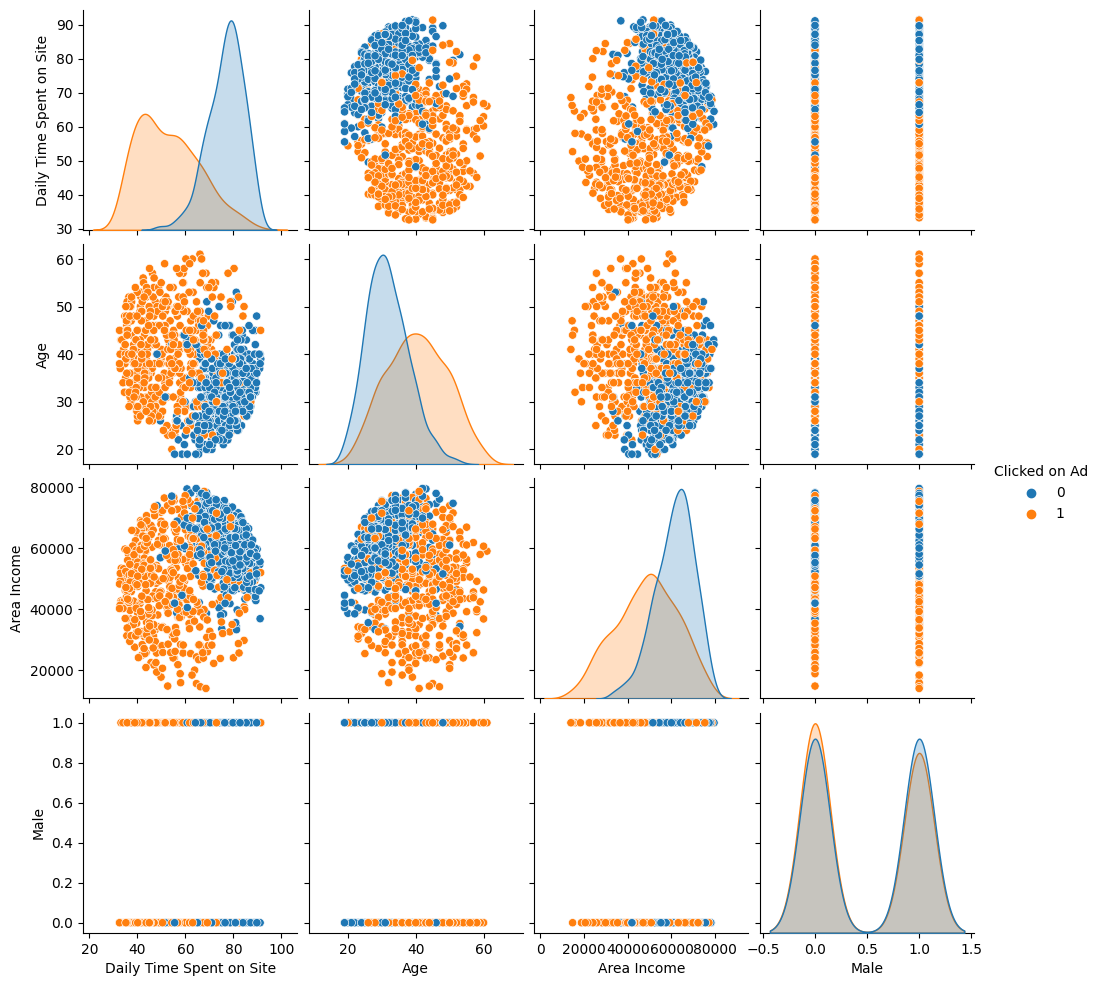

In [ ]:
sns.pairplot(data = df, hue = 'Clicked on Ad') ;

Covariance matrix

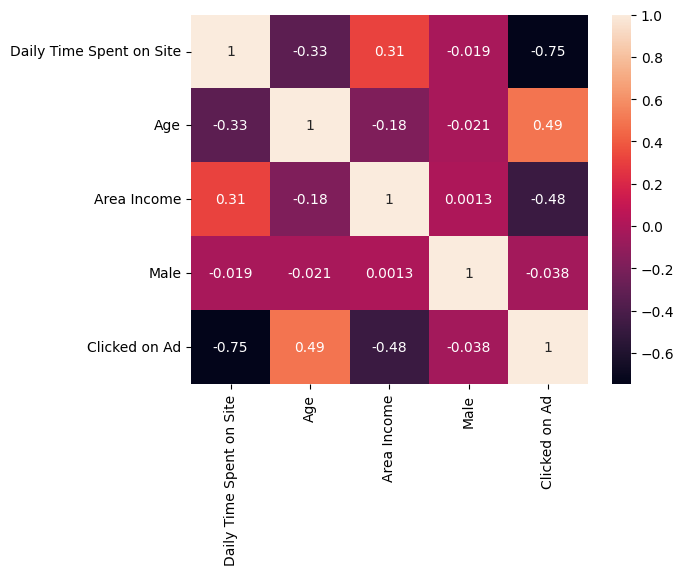

In [ ]:
sns.heatmap(df.corr(), annot = True) ;

In [ ]:
X = df.drop(columns = ['Clicked on Ad'])
feature_names = X.columns.tolist()
X = X.values

y = df['Clicked on Ad'].values
target_name = 'Clicked on Ad'

print(f"Features: {feature_names}")
print(f"Target: {target_name}")

Features: ['Daily Time Spent on Site', 'Age', 'Area Income', 'Male']
Target: Clicked on Ad


Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = .8,
                                                    random_state = 42)

N_train, N_test = len(y_train), len(y_test)

print(f"Training Size = {N_train}")
print(f"Test Size = {N_test}")

Training Size = 800
Test Size = 200


Standardize the data

In [ ]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

Fit a logistic regression model

In [ ]:
lr = LogisticRegression()
lr.fit(X_train_s, y_train) ;

Predict on training and test data

In [ ]:
y_train_pred = lr.predict(X_train_s)
y_test_pred = lr.predict(X_test_s)

---

**Accuracy** measures the proportion of the total number of prediction that were correct.

Accuracy =
(Number of Correct Predictions) / (Total Number of Predictions Made)

Answers the question: *How often was the model correct in predicting user ad click behavior?*

In [ ]:
acc_train = metrics.accuracy_score(y_train, y_train_pred)
acc_test = metrics.accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {acc_train:.2f}")
print(f"Test accuracy: {acc_test:.2f}")

Training accuracy: 0.93
Test accuracy: 0.90


**Key assumption of accuracy**

Class are well-mixed, meaning the proportion of each class is roughly equal or the price of misclassification is similar for all classes.

**Pros and cons of accuracy**

*Pro*: Gives a quick and easy-to-grasp measure of overall performance.

*Con*: Can overstate performance if the one class dominates another. For example if a training set is 95% class '1' and 5% class '2', then if a model is designed to only predict class '1' all the time, it will still be correct 95% of the time. If the test set has a much lower proportion of class '1' (say about 50% instead of 95%), then this metric will greatly overstate the model's ability to correctly classify.

---

**Precision** (Positive Predictive Value, PPV) is the proportion of true positives that were correctly classified.

Precision = (True Positives) / (True Positives + False Positives)

Answers the question: *Of all the ad clicks predicted by the model, how many were actually correct?*

In [ ]:
precision_train = metrics.precision_score(y_train, y_train_pred)
precision_test = metrics.precision_score(y_test, y_test_pred)

print(f"Training precision: {precision_train:.2f}")
print(f"Test precision: {precision_test:.2f}")

Training precision: 0.96
Test precision: 0.94


**Key Assumption of precision**

The cost of false positives is high, while the cost of false negatives is low.

**Pros and cons of precision**

*Pro*: Useful when it is important to minimize the rate of false positives.

*Con*: Value can still be high even which there are many false negatives.

---
**Recall** (Sensitivity, True Positive Rate [TPR]) is the proportion of true positives that were correctly predicted

Recall = (True Positives) / (True Positives + False Negatives)

Answers the question: *Of all the actual ad clicks, how many were correctly predicted?*

In [ ]:
recall_train = metrics.recall_score(y_train, y_train_pred)
recall_test = metrics.recall_score(y_test, y_test_pred)

print(f"Training recall: {recall_train:.2f}")
print(f"Test recall: {recall_test:.2f}")

Training recall: 0.90
Test recall: 0.86


We find that our models recall (86%) is much lower than our precision (94%). This suggests that our model may be somewhat conservative in predicting add clicks.

**Key Assumption of recall**

The cost of false negatives is high, while the cost of false positives is low.

**Pros and cons of recall**

*Pro*: Useful when it is important to minimize the rate of false negatives.

*Con*: Value can still be high even which there are many false positives.

---
**F1 Score** (Harmonic mean of precision and recall) is a composite measure of precision and recall. If at least one is low, then the score is low.



F1 = 2 x (Precision x Recall)/(Precision + Recall)

Answers the question: *Is our model good at balancing correct predictions of ad clicks with not falsely predicting them?*

In [ ]:
f1_train = metrics.f1_score(y_train, y_train_pred)
f1_test = metrics.f1_score(y_test, y_test_pred)

print(f"Training F1: {f1_train:.2f}")
print(f"Test F1: {f1_test:.2f}")

Training F1: 0.93
Test F1: 0.90


While our recall is lower than our precision, a high F1 (90%) indicates that our model is balanced ad click predictor.

**Key Assumption of F1**

Both the cost of false positives and false negatives are high.

**Pros and cons of F1**

*Pro*: takes into account the consequences for both types of error.

*Con*: If F1 is low, you know that precision or recall is low, but not which one.

---
**Specificity** (True Negative Rate, TNR) is the actual negatives that were correctly predicted.

TNR = (True Negatives) / (True Negatives + False Positives)

Answers the question: *How good is our model at avoiding falsely predicting an ad click?*

In [ ]:
def specificity(y_true, y_pred):
  tn, fp, _, _ = metrics.confusion_matrix(y_true, y_pred).ravel()
  return tn / (tn + fp) if (tn + fp) > 0 else 0

In [ ]:
tnr_train = specificity(y_train, y_train_pred)
tnr_test = specificity(y_test, y_test_pred)

print(f"Training TNR: {tnr_train:.2f}")
print(f"Test TNR: {tnr_test:.2f}")

Training TNR: 0.96
Test TNR: 0.93


**Key Assumption of specificity**

Similar to recall, the cost of false positives is high.

**Pros and cons of specificity**

*Pro*: Useful for testing the model's ability to correctly predict negatives.

*Con*: Can be very high even when there is a high rate of false negatives.

---
**Negative Predictive Value (NPV)** is the proportion of predicted negatives that are correct.

NPV = (True Negatives) / (True Negatives + False Negatives)

Answers the question: *Of all the times the model predicted an ad click not to occur, how many were actually correct?*

In [ ]:
def npv(y_true, y_pred):
  tn, _, fn, _ = metrics.confusion_matrix(y_true, y_pred).ravel()
  return tn / (tn + fn) if (tn + fn) > 0 else 0

In [ ]:
npv_train = npv(y_train, y_train_pred)
npv_test = npv(y_test, y_test_pred)

print(f"Training NPV: {npv_train:.2f}")
print(f"Test NPV: {npv_test:.2f}")

Training NPV: 0.91
Test NPV: 0.85


---
**False Positive Rate** (FPR) is the proportion of actual negatives there were incorrectly classified as positive.

FPR = (False Positives) / (False Positives + True Negatives)

Answers the question: *How often does our model incorrectly predict ad clicks?*

In [ ]:
def fpr(y_true, y_pred):
  tn, fp, _, _ = metrics.confusion_matrix(y_true, y_pred).ravel()
  return fp / (fp + tn) if (fp + tn) > 0 else 0

In [ ]:
fpr_train = fpr(y_train, y_train_pred)
fpr_test = fpr(y_test, y_test_pred)

print(f"Training FPR: {fpr_train:.2f}")
print(f"Test FPR: {fpr_test:.2f}")

Training FPR: 0.04
Test FPR: 0.07


Our model falsely predicts ad clicks 7% of the time.

**Key Assumption of FPR**

It is imperative to identify true negatives.

**Pros and cons of FPR**

*Pro*: Useful for testing the model's ability to correctly predict negatives.

*Con*: Can be very low even when there is a high rate of false negatives.

---
**False Discovery Rate** (FDR) is the proportion of positive predictions that are false.

FDR = (False Positives) / (False Positives + True Positives)

Answers the question: *How often is our model's prediction that an ad click occurs incorrect?*

In [ ]:
def fdr(y_true, y_pred):
  tn, fp, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
  return fp / (fp + tp) if (fp + tp) > 0 else 0

In [ ]:
fdr_train = fdr(y_train, y_train_pred)
fdr_test = fdr(y_test, y_test_pred)

print(f"Training FDR: {fdr_train:.2f}")
print(f"Test FDR: {fdr_test:.2f}")

Training FDR: 0.04
Test FDR: 0.06


6% of our model predictions that an ad click occured were incorrect.

**Key Assumption of FDR**

It is imperative to avoid false positive predictions. The cose of a false positive prediction is high.

**Pros and cons of FDR**

*Pro*: Explicitly devouting to measuring how wrong only positive predictions are, so helpful when positive cases are rare.

*Con*: FDR can be low even when there is a high rate of false negatives (miss many actual positives).

---
**False Negative Rate** (FNR) is the proportion of actual positives that were missed.

FNR = (False Negatives) / (False Negatives + True Positives)

Answers the question: *How often does our model incorrectly predict that an ad click did not occur?*

In [ ]:
def fnr(y_true, y_pred):
  _, _, fn, tp = metrics.confusion_matrix(y_true, y_pred).ravel()
  return fn / (fn + tp) if (fn + tp) > 0 else 0

In [ ]:
fnr_train = fnr(y_train, y_train_pred)
fnr_test = fnr(y_test, y_test_pred)

print(f"Training FNR: {fnr_train:.2f}")
print(f"Test FNR: {fnr_test:.2f}")

Training FNR: 0.10
Test FNR: 0.14


Our model has a higher FNR (14%) than FDR (6%), indicating that it is more prone to missing actual ad clicks than incorrectly predicting them to occur. This again suggests the conservative state of our model.

---
**Receiver Operating Characteristics plot** (ROC) is a graphical representation of the performance of a binary classifier, plotting the true positive rate (TPR [recall, sensitivity]) agains the FPR (1 - specificity) at different thresholds.

Answers the question: *What is the tradeof between correctly detecting ad clicks and avoiding falsely predicting them at different detection thresholds?*

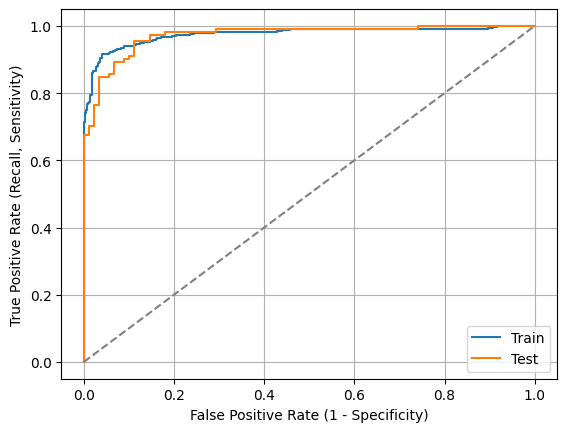

In [ ]:
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, lr.predict_proba(X_train_s)[:, 1])
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(y_test, lr.predict_proba(X_test_s)[:, 1])

plt.plot(fpr_train, tpr_train, label = 'Train')
plt.plot(fpr_test, tpr_test, label = 'Test')
plt.legend()
plt.plot([0, 1], [0, 1], color = 'gray', linestyle = '--')
plt.ylabel('True Positive Rate (Recall, Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.grid() ;

---
**Area under curve** (AUC) is the area under the ROC curve, measuring the abality of the model to distinguish between the two classes. AUC = 0.5 means it is no better than random guessing, AUC > 0.5 means it is better than random guessing, and AUC < 0.5 means it is worse than random guessing.

Answers the question: *How well does our model distinguish between the two classes of clicking on an ad and not?*

In [ ]:
auc_train = metrics.auc(fpr_train, tpr_train)
auc_test = metrics.auc(fpr_test, tpr_test)

print(f"Training AUC: {auc_train:.2f}")
print(f"Test AUC: {auc_test:.2f}")

Training AUC: 0.98
Test AUC: 0.97


Our model's AUC is 97%, indicating good discriminatory capacity.

**Key Assumption of AUC**

The model generated scores are well-calibrated to be interpreted as probabilities. TPR (recall) and FPR are both equally important for all detection thresholds (the costs for each are invariant to the detection threshold).

**Pros and cons of AUC**

*Pro*: A single measure is given that aggregates all the thresholds, so is threshold independent. This allows different models to be compared. If model A has AUC = 0.8 and model B has AUC = 0.6, then model A can distinguish between 20% more of the data than model B.

*Con*: 1) Lose threshold-level evaluation. 2) Does not account for possible differences in the cost between a false positive and false negative.  

---
**Matthews Correlation Coefficient** (MCC) measures the quality of binary classifications by balancing false positives and false negatives.

MCC = (TN x TP - FN * FP) / sqrt((TP+FP)(TP+FN)(TN+FP)(TN+FN))

MCC = +1: Perfection predictions. Each classification matches the target.

MCC = 0: Predictions are no better than random guessing

MCC = -1: Total prediction disagreement. Not one classification matches the target.

Answers the question: How well does our model classify ad clicks, regardless of the imbalance between clicks and non-clicks?



In [ ]:
mcc_train = metrics.matthews_corrcoef(y_train, y_train_pred)
mcc_test = metrics.matthews_corrcoef(y_test, y_test_pred)

print(f"Training MCC: {mcc_train:.2f}")
print(f"Test MCC: {mcc_test:.2f}")

Training MCC: 0.87
Test MCC: 0.79


Our model predictions have good correlation with the target values (MCC = 0.79).


---
**Cohen's Kappa** is a measure of how much better a classifier performs than by random chance.

In general, it is defined as

κ = (P_o - P_e)/(1 - P_e)

where P_o is the observed proportion of agreement and P_e is hypothetical probability of chance agreement (calculated from the data).

In binary classification, it is equivalent to:

κ = 2 * (TP*TN - FN*FP) / ((TP+FP)(FP+TN)(TP+FN)(FN+TN))

κ is different from MCC in that

1) κ is derived from the observed observed agreement and expected/theoretical agreement by chance, whereas MCC is derived from the Pearson correlation coefficient.

2) κ is not limited to binary classification, whereas MCC is limited to binary classification.


Answers the question: *How much better is the agreement between the observed ad clicks and the predicted ad clicks than if the classifications were made randomly?*

In [ ]:
k_train = metrics.cohen_kappa_score(y_train, y_train_pred)
k_test = metrics.cohen_kappa_score(y_test, y_test_pred)

print(f"Training κ: {k_train:.2f}")
print(f"Test κ: {k_test:.2f}")

Training κ: 0.87
Test κ: 0.79


Our model predictions have good correlation with the target values (k = 0.79).